# F1 Championship

This python notebook is to process and plot some of the statistics on the F1 2017 Championship. The data that is used in this notebook is taken from http://ergast.com

In [8]:
import requests
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)

Year = "2019"
total_races = 16


Download the data for the current driver standings and get the formating correct to be used with matplotlib, also get the drivers shortcodes to be used on the axis

In [9]:
url_Standings = "http://ergast.com/api/f1/%s/driverStandings.json" % Year
response = requests.get(url=url_Standings)
JSON_Driver_Standings = response.json()
Driver_Standings = JSON_Driver_Standings["MRData"]["StandingsTable"]["StandingsLists"][0]["DriverStandings"]
driver = list()
points = np.zeros(len(Driver_Standings))
count = 0
for data in Driver_Standings:
    points[count] = data["points"]
    driver.append(data["Driver"]["code"])
    count = count +1
    


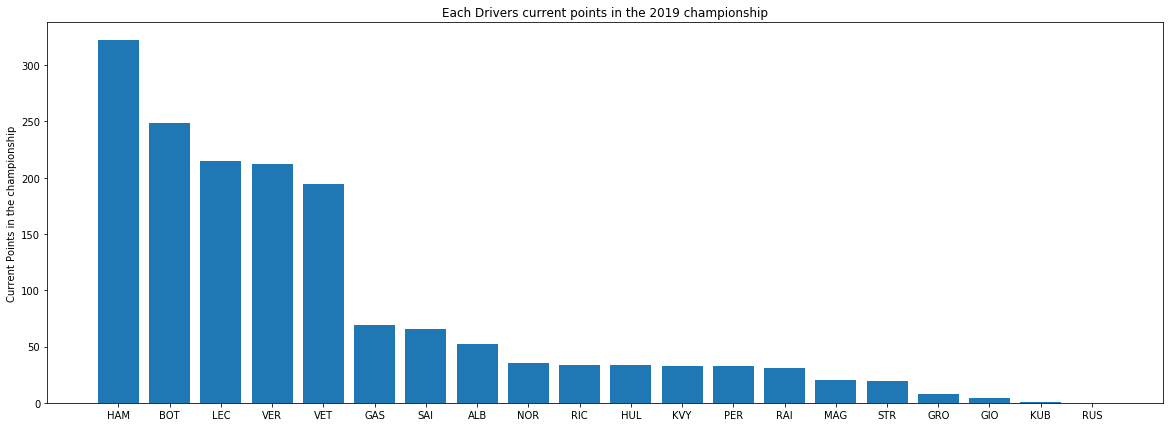

In [10]:
plt.bar(range(len(driver)),points)
plt.xticks(range(len(driver)), driver)
plt.title("Each Drivers current points in the %s championship" % Year)
plt.ylabel("Current Points in the championship")
plt.grid = True
plt.show()

Download the results for each of the races and place in an numpy array, the results need to be seperated for each of the drivers.

In [11]:
driver_count = len(driver)
circuits = list()
race_points = np.zeros((total_races, driver_count))
race_total = np.zeros((total_races, driver_count))

for race_count in range(total_races):
    url_race = "http://ergast.com/api/f1/%s/%i/results.json" % (Year, (race_count+1))
    response = requests.get(url=url_race)
    JSON_race = response.json()
    race_results = JSON_race["MRData"]["RaceTable"]["Races"][0]["Results"]
    circuits.append(JSON_race['MRData']['RaceTable']["Races"][0]['Circuit']['Location']['country'])
    
    for results_count in range(len(race_results)):
        for count_drivers in range(len(driver)-1):
            if race_results[results_count]["Driver"]["code"] == driver[count_drivers]:
                race_points[race_count,count_drivers] = race_results[results_count]["points"]
            race_total[race_count,count_drivers] = race_points[race_count,count_drivers]
            if race_count > 0 :
                race_total[race_count,count_drivers] = race_total[race_count,count_drivers] + race_total[race_count-1,count_drivers]

                


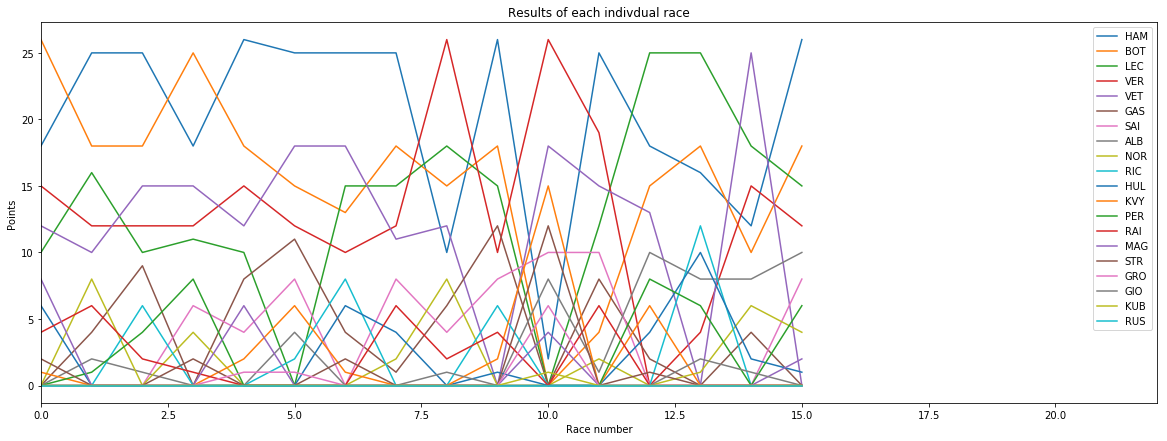

In [12]:
plt.plot(race_points)
plt.ylabel("Points")
plt.xlabel("Race number")
plt.legend(driver)
plt.xlim([0,22])
plt.title("Results of each indivdual race")
plt.show()

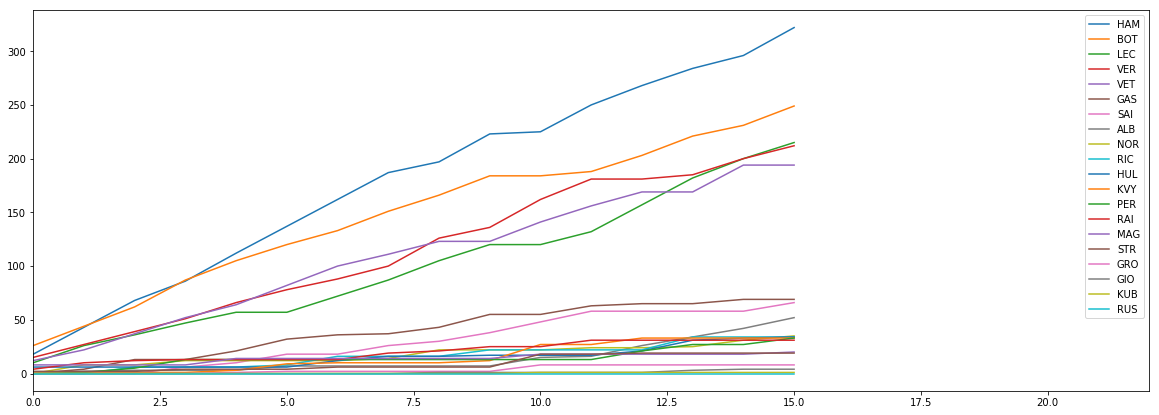

In [13]:
plt.plot(race_total)
plt.legend(driver)
plt.xlim([0,22])
plt.grid = True
plt.gridline = True
plt.show()

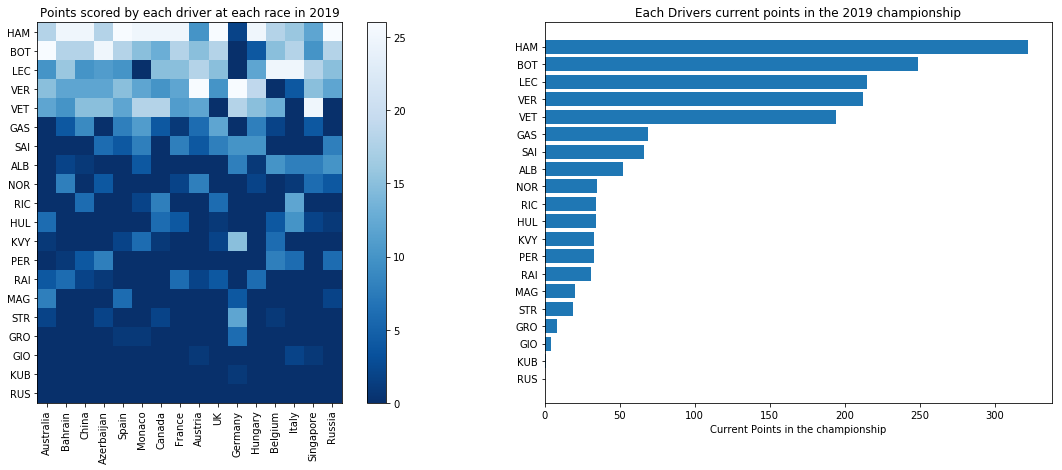

In [14]:
plt.subplot(1,2,1)
plt.imshow(np.flip(np.rot90(race_points, k=3),axis=1), interpolation='nearest', cmap=plt.cm.Blues_r)
plt.colorbar()
tick_driver = np.arange(len(driver))
tick_circuit = np.arange(len(circuits))

plt.xticks(tick_circuit, circuits, rotation=90)
plt.yticks(tick_driver, driver)
plt.title('Points scored by each driver at each race in %s' % Year)

plt.subplot(1,2,2)
plt.barh(range(len(driver)),np.flip(points,axis=0))
plt.yticks(range(len(driver)), reversed(driver))
plt.title("Each Drivers current points in the %s championship" % Year)
plt.xlabel("Current Points in the championship")
plt.grid = True

plt.savefig('%s_results.png' % Year)

plt.show()